In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_detsys_all_2D_t/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Welcome to JupyROOT 6.18/04


In [2]:
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"Detector_systematic_2D.root","RECREATE");
RootFile.Close()

In [3]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [4]:
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
filename_data = 'NuCCana_data_V25_run3.root'
filename_ext = 'NuCCana_ext_V25_G1.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
tree_name = 'numuCCAna'

In [5]:
data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
#NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =     9.457e+18 # 8.649e+18  # best with tor875
data_trigger = 2278230.0 #2220362.0  #E1DCNT_wcut
ext_trigger =  85768579.0  #2120135 #5685315 # EXT


sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]

Scalefactors: 
Data:		1.0
Ext:		0.0265625247213
Overlay:	0.00745751020846
Dirt:		0.0747380828946


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4_noflux.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	34608
Ext: Number of Entries:		1018742
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 6.97830e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition

#numu_nomuon = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # numu CC signal definition
numu_nomuon = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && (MCTrackPDG!=13 || (MCTrackPDG==13 && MCle_Energy<=0.15))&& MCTrackPurity>0.5' # numu CC signal definition
numu_nue = 'fidVol && MCfidVol && MCNu_CCNC==0 && abs(MCNu_PDG)!=14 && MCTrackPurity>=0.5' # e.g anti nu or nue
numu_antinu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==-14 && MCTrackPurity>=0.5' # e.g anti nu or nue
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1 && MCTrackPurity>=0.5' # nutral current
numu_ov = 'fidVol && !MCfidVol && MCTrackPurity>=0.5' # out of fiducial
numu_cosmic = 'fidVol && MCTrackPurity<0.5' #low purity

#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

    
energy_cut = ' && MCle_Energy>0.15'
numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
#numu_nomu = numu_nomu+energy_cut
#numu_lowpur = numu_lowpur+energy_cut
#numu_nc = numu_nc+energy_cut
#numu_ov = numu_ov+energy_cut
#numu_other = numu_other+energy_cut

num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomuon',numu_nomuon)
    x.SetAlias('numu_nue',numu_nue)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_antinu',numu_antinu)
    x.SetAlias('numu_cosmic',numu_cosmic)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = ['numu_cosmic','numu_ov','numu_nc','numu_antinu','numu_nue','numu_nomuon','numu_signal']

for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

#num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomuon',numu_nomuon)
    x.SetAlias('numu_nue',numu_nue)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_antinu',numu_antinu)
    x.SetAlias('numu_cosmic',numu_cosmic)

In [9]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [10]:

track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [11]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
#mom_bins.Append()
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    #print len_mom[i]
    sum_bins+=len_mom[i]

#print len_mom
#print sum(len_mom), sum_bins


In [12]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

# CRTinBNB tagger, Overlay or MC

In [13]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
f_cv = ROOT.TFile.Open(path+"xsec_detsys_CV_2D_t/xsec_detsys_CV_2D.root", 'read')
f_sce = ROOT.TFile.Open(path+"xsec_detsys_SCE_2D_t/xsec_detsys_SCE_2D.root", 'read')
f_lydown = ROOT.TFile.Open(path+"xsec_detsys_LYdown_2D_t/xsec_detsys_LYdown_2D.root", 'read')
f_wireanglexz = ROOT.TFile.Open(path+"xsec_detsys_WireAngleXZ_2D_t/xsec_detsys_WireAngleXZ_2D.root", 'read')
f_wireangleyz = ROOT.TFile.Open(path+"xsec_detsys_WireAngleYZ_2D_t/xsec_detsys_WireAngleYZ_2D.root", 'read')
f_wiremodx = ROOT.TFile.Open(path+"xsec_detsys_WireModX_2D_t/xsec_detsys_WireModX_2D.root", 'read')
f_wiremodyz = ROOT.TFile.Open(path+"xsec_detsys_WireModYZ_2D_t/xsec_detsys_WireModYZ_2D.root", 'read')

f_lyatt = ROOT.TFile.Open(path+"xsec_detsys_LYAtt_2D_t/xsec_detsys_LYAtt_2D.root", 'read')
f_lyray = ROOT.TFile.Open(path+"xsec_detsys_LYRay_2D_t/xsec_detsys_LYRayleigh_2D.root", 'read')

f_dedx = ROOT.TFile.Open(path+"xsec_detsys_dEdx_2D_t/xsec_detsys_dEdx_2D.root", 'read')
f_recomb2 = ROOT.TFile.Open(path+"xsec_detsys_recomb2_2D_t/xsec_detsys_recomb2_2D.root", 'read')


In [14]:
pot_data =     7.644e+18 
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

def draw_adding_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [15]:
def plot_detsys_histo(name):
    ROOT.gStyle.SetOptTitle(1)
    files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_recomb2]
    #name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh', 'recomb2' ]
    name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']

    h_files = []
    i = 0
    legend = ROOT.TLegend(0.15,0.55,0.45,0.9); #LEGEND RIGHT
    for x in files:
        h_files.append(x.Get(name))
        legend.AddEntry(h_files[i],name_files[i],"f")
        h_files[i].SetLineColor(i+1)
        h_files[i].SetLineWidth(4)
        h_files[i].GetYaxis().SetTitleSize(0.05)
        h_files[i].GetYaxis().SetTitleOffset(0.0)
        h_files[i].GetYaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleSize(0.05)
        h_files[i].GetXaxis().SetLabelSize(0.05)
        h_files[i].GetXaxis().SetTitleOffset(1)
        if (i+1)==10:
            h_files[i].SetLineColor(30)
        if i == 0:
            h_files[i].SetMaximum(-1111)
            h_files[i].SetMaximum(h_files[i].GetMaximum()*1.5)
            h_files[i].SetTitle(name)
            h_files[i].SetXTitle("Bin number")
            h_files[i].SetYTitle("Number of entries")
            h_files[i].Draw('hist')
            legend.Draw()
        else:
            h_files[i].Draw("hist same")
        i+=1
    h_files[0].Draw("hist same")
    h_files[0].Draw("text same")
    legend.Draw()

    c1.Draw()
    del h_files[:]

    c1.SaveAs(outputdir_png + 'h_'+name+'_all.png')
    c1.SaveAs(outputdir_root + 'h_'+name+'_all.root')
    c1.SaveAs(outputdir_pdf + 'h_'+name+'_all.pdf')
    ROOT.gStyle.SetOptTitle(0)
    return

#h_files.clear()

ploting:  h_sel_all
ploting:  h_gen_all
ploting:  h_eff_all


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_h_sel_all_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/root/h_h_sel_all_all.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_h_sel_all_all.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_h_gen_all_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/root/h_h_gen_all_all.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_h_gen_all_all.pdf has been created
Info in 

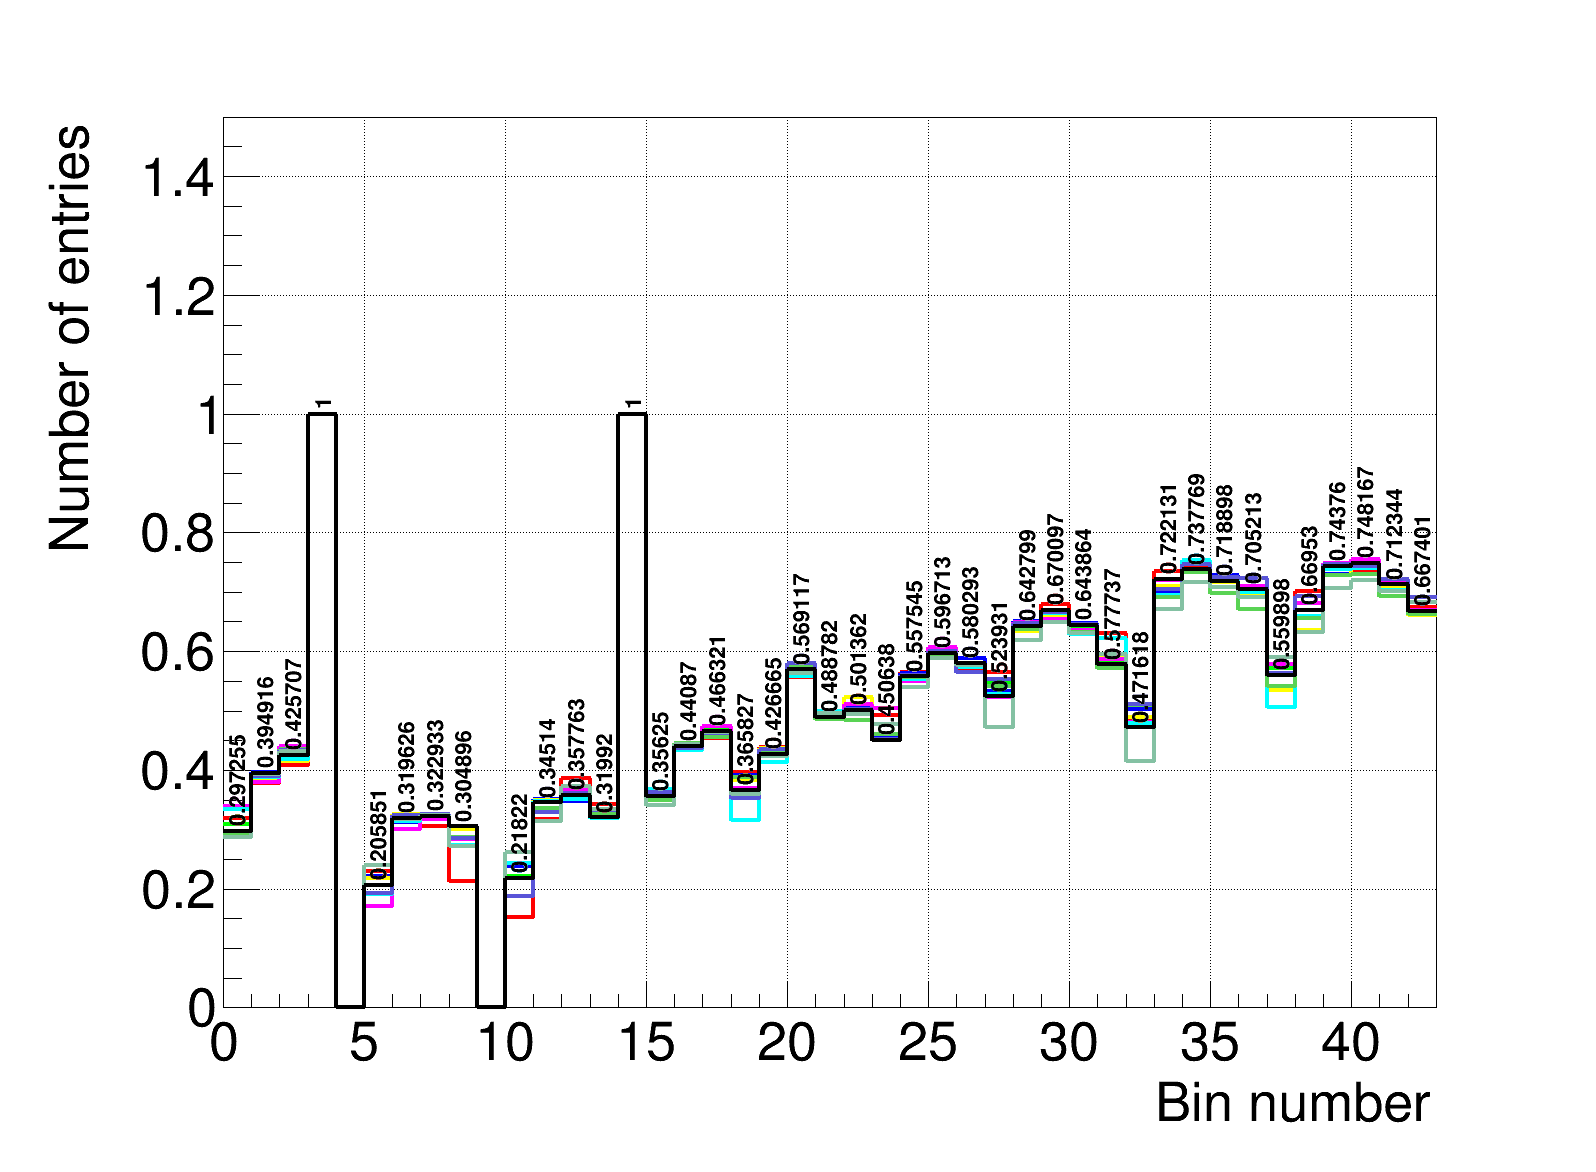

In [16]:

variable_list = ['h_sel_all','h_gen_all','h_eff_all']
for x in variable_list:
    print 'ploting: ', x
    plot_detsys_histo(x)

In [17]:
# get eff_tilde
files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_recomb2]
#name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh', 'recomb2' ]
name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']
h_1d_eff_tilde = []
for t_bin in range(len_theta):
    h_1d_eff_tilde.append([])
    for i,x in enumerate(files):
        h_1d_eff_tilde[t_bin].append(x.Get('h_1d_eff_tilde['+str(t_bin)+']'))
        
RootFile = ROOT.TFile(output_filedir+"Detector_systematic_2D.root","update");
for t_bin in range(len_theta):      
    for i,x in enumerate(files):
        h_1d_eff_tilde[t_bin][i].Write('h_1d_eff_tilde['+str(t_bin)+']['+str(i)+']')
RootFile.Close()

In [18]:
# get background
h_overlay = []
for t_bin in range(len_theta):
    h_overlay.append([])
    for i,x in enumerate(files):
        h_overlay[t_bin].append(x.Get('h_overlay['+str(t_bin)+']'))
        #h_1d_eff_tilde[t_bin][i].Write('h_1d_eff_tilde['+str(t_bin)+']['+str(i)+']')

RootFile = ROOT.TFile(output_filedir+"Detector_systematic_2D.root","update");
for t_bin in range(len_theta):      
    for i,x in enumerate(files):
        h_overlay[t_bin][i].Write('h_overlay['+str(t_bin)+']['+str(i)+']')
RootFile.Close()

In [19]:
h_data = []
h_ext = []
h_dirt = []
#h_overlay = []
#h_signal = []
#h_true = []
h_temp = []

cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

for t_bin in range(len_theta):
    h_data.append( ROOT.TH1F('h_data['+str(t_bin)+']',"data",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_ext.append( ROOT.TH1F('h_ext['+str(t_bin)+']',"h_ext",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_dirt.append( ROOT.TH1F('h_dirt['+str(t_bin)+']',"h_dirt",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    #h_overlay.append( ROOT.TH1F('h_overlay['+str(t_bin)+']',"h_overlay",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    #h_signal.append( ROOT.TH1F('h_signal['+str(t_bin)+']',"h_signal",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    #h_true.append( ROOT.TH1F('h_true['+str(t_bin)+']',"h_true",len_mom[t_bin],array('f',mom_bins[t_bin])) )

    h_temp.append( ROOT.TH1F('h_temp['+str(t_bin)+']','h_temp',len_mom[t_bin],array('f',mom_bins[t_bin])))
    
#bin_counter = 0
for t_bin in range(len_theta):
    this_cut = ' && cos(TrackTheta)>'+str(theta_bins[t_bin])+' && cos(TrackTheta)<'+str(theta_bins[t_bin+1])
    print this_cut
    globale.data_out.Draw('TrackMomMCS_mom'+'>>h_data['+str(t_bin)+']',cut+this_cut+' && track_end_uncontained','')
    globale.data_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',cut+this_cut+' && !track_end_uncontained','')
    h_data[t_bin].Add(h_temp[t_bin])
    h_data[t_bin].Scale(globale.scale[globale.data])
    
    globale.ext_out.Draw('TrackMomMCS_mom'+'>>h_ext['+str(t_bin)+']',cut+this_cut+' && track_end_uncontained','')
    globale.ext_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',cut+this_cut+' && !track_end_uncontained','')
    h_ext[t_bin].Add(h_temp[t_bin])
    h_ext[t_bin].Scale(globale.scale[globale.ext])
    
    globale.dirt_out.Draw('TrackMomMCS_mom'+'>>h_dirt['+str(t_bin)+']',weight_name+'*('+cut+this_cut+' && track_end_uncontained)','')
    globale.dirt_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut+this_cut+' && !track_end_uncontained)','')
    h_dirt[t_bin].Add(h_temp[t_bin])
    h_dirt[t_bin].Scale(globale.scale[globale.dirt])
    
    ''' globale.overlay_out.Draw('TrackMomMCS_mom'+'>>h_overlay['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& !numu_signal && track_end_uncontained)','')
    globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& !numu_signal && !track_end_uncontained)','')
    h_overlay[t_bin].Add(h_temp[t_bin])
    h_overlay[t_bin].Scale(globale.scale[globale.overlay])
    
    globale.overlay_out.Draw('TrackMomMCS_mom'+'>>h_signal['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && track_end_uncontained)','')
    globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && !track_end_uncontained)','')
    h_signal[t_bin].Add(h_temp[t_bin])
    h_signal[t_bin].Scale(globale.scale[globale.overlay])
    
    this_cut_true = ' && cos(MCNu_leptonTheta)>'+str(theta_bins[t_bin])+' && cos(MCNu_leptonTheta)<'+str(theta_bins[t_bin+1])
    globale.overlay_out.Draw('MCle_Energy>>h_true['+str(t_bin)+']',weight_name+'*(numu_true'+this_cut_true+')','')
    h_true[t_bin].Scale(globale.scale[globale.overlay])
    '''
    #h_data[t_bin].Write('h_data['+str(t_bin)+']')
    #h_ext[t_bin].Write('h_ext['+str(t_bin)+']')
    #h_dirt[t_bin].Write('h_dirt['+str(t_bin)+']')
    #h_overlay[t_bin].Write('h_overlay['+str(t_bin)+']')
    #h_signal[t_bin].Write('h_signal['+str(t_bin)+']')
    #h_true[t_bin].Write('h_true['+str(t_bin)+']')
RootFile = ROOT.TFile(output_filedir+"Detector_systematic_2D.root","update");
for t_bin in range(len_theta):      
    h_data[t_bin].Write('h_data['+str(t_bin)+']')
    h_ext[t_bin].Write('h_ext['+str(t_bin)+']')
    h_dirt[t_bin].Write('h_dirt['+str(t_bin)+']')
RootFile.Close()


 && cos(TrackTheta)>-1.0 && cos(TrackTheta)<-0.5
 && cos(TrackTheta)>-0.5 && cos(TrackTheta)<0.0
 && cos(TrackTheta)>0.0 && cos(TrackTheta)<0.28
 && cos(TrackTheta)>0.28 && cos(TrackTheta)<0.47
 && cos(TrackTheta)>0.47 && cos(TrackTheta)<0.63
 && cos(TrackTheta)>0.63 && cos(TrackTheta)<0.765
 && cos(TrackTheta)>0.765 && cos(TrackTheta)<0.865
 && cos(TrackTheta)>0.865 && cos(TrackTheta)<0.935
 && cos(TrackTheta)>0.935 && cos(TrackTheta)<1.0


In [20]:
# get background
h_xsec_data = []
for t_bin in range(len_theta):
    h_xsec_data.append([])
    for i,x in enumerate(files):
        h_xsec_data[t_bin].append(h_data[t_bin].Clone())
        h_xsec_data[t_bin][i].Add(h_ext[t_bin],-1)
        h_xsec_data[t_bin][i].Add(h_dirt[t_bin],-1)
        h_xsec_data[t_bin][i].Add(h_overlay[t_bin][i],-1)
        
        #h_1d_eff_tilde[t_bin][i].Write('h_1d_eff_tilde['+str(t_bin)+']['+str(i)+']')

In [21]:
# correct for efficiency, scale for xsec
for t_bin in range(len_theta):
    for i,x in enumerate(files):
        #h_xsec_data[t_bin][i].Divide(h_1d_eff_tilde[t_bin][i])
        h_xsec_data[t_bin][i].Scale(1.0/(N_tot*beam_flux*1e-38))

In [22]:
for t_bin in range(len_theta):
    for i,x in enumerate(files):
        for m_bin in range(len_mom[t_bin]):
                h_xsec_data[t_bin][i].SetBinContent(m_bin+1,h_xsec_data[t_bin][i].GetBinContent(m_bin+1)/h_xsec_data[t_bin][i].GetBinWidth(m_bin+1))
                h_xsec_data[t_bin][i].SetBinError(m_bin+1,h_xsec_data[t_bin][i].GetBinError(m_bin+1)/h_xsec_data[t_bin][i].GetBinWidth(m_bin+1))
        bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
        h_xsec_data[t_bin][i].Scale(1.0/bin_width_theta)

RootFile = ROOT.TFile(output_filedir+"Detector_systematic_2D.root","update");
for t_bin in range(len_theta):      
    for i,x in enumerate(files):
        h_xsec_data[t_bin][i].Write('h_xsec_data['+str(t_bin)+']['+str(i)+']')
RootFile.Close()

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_xsec_2D_0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_xsec_2D_0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_xsec_2D_1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_xsec_2D_1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_xsec_2D_2.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_xsec_2D_2.pdf has been created
Info in <TCanvas::Print>: png file /home

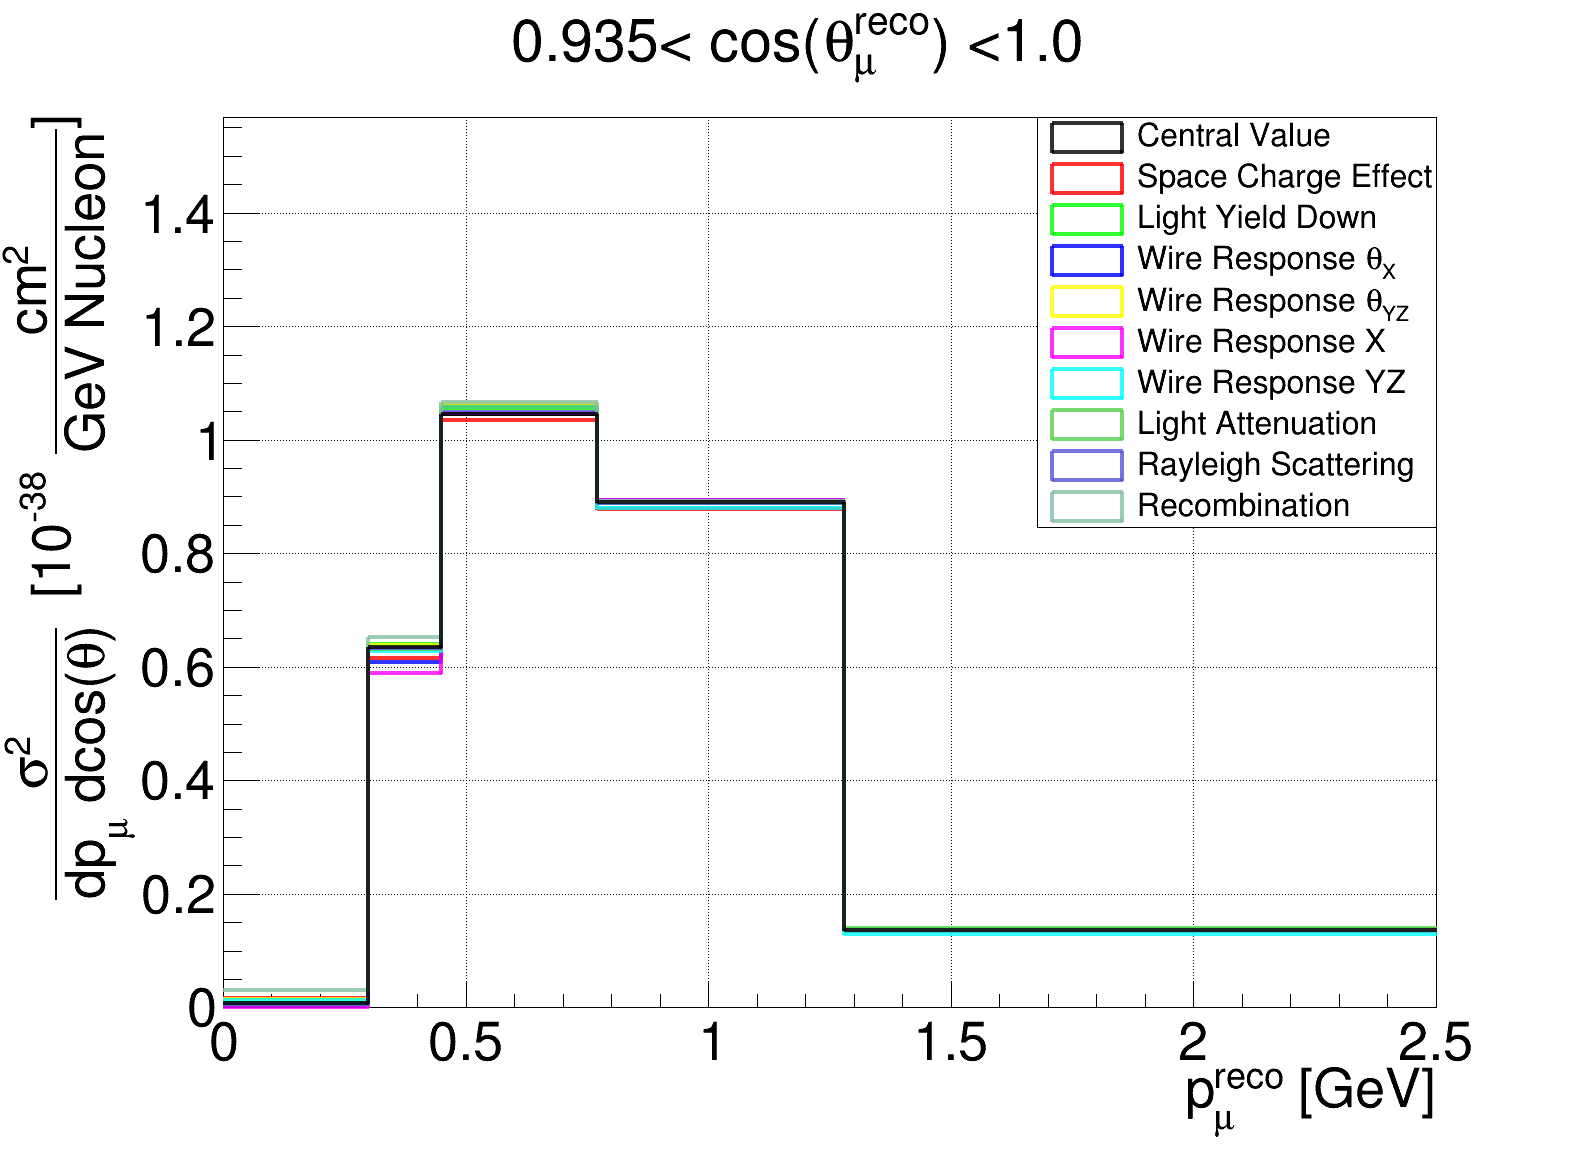

In [23]:
# draw all xsec

ROOT.gStyle.SetOptTitle(1)

for t_bin in range(len_theta): #len_theta
    legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
    for i,x in enumerate(files):
        h_xsec_data[t_bin][i].SetLineColorAlpha(i+1,0.8)
        if (i+1)==10:
            h_xsec_data[t_bin][i].SetLineColorAlpha(30,0.8)
        legend.AddEntry(h_xsec_data[t_bin][i],name_files[i],"f")
        h_xsec_data[t_bin][i].GetYaxis().SetTitleSize(0.05)
        h_xsec_data[t_bin][i].GetYaxis().SetTitleOffset(0.0)
        h_xsec_data[t_bin][i].GetYaxis().SetLabelSize(0.05)
        h_xsec_data[t_bin][i].GetXaxis().SetTitleSize(0.05)
        h_xsec_data[t_bin][i].GetXaxis().SetLabelSize(0.05)
        h_xsec_data[t_bin][i].GetXaxis().SetTitleOffset(1)
        h_xsec_data[t_bin][i].SetLineWidth(4)
        if i == 0:
            h_xsec_data[t_bin][i].SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
            h_xsec_data[t_bin][i].SetXTitle("p^{reco}_{#mu} [GeV]")
            h_xsec_data[t_bin][i].SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
            h_xsec_data[t_bin][i].SetMaximum(-1111)
            h_xsec_data[t_bin][i].SetMaximum( h_xsec_data[t_bin][i].GetMaximum()*1.5)
            h_xsec_data[t_bin][i].Draw('hist')
        else:
            h_xsec_data[t_bin][i].Draw('hist same')
    h_xsec_data[t_bin][0].Draw('hist same')
    legend.Draw()
    c1.SaveAs(globale.outputdir_png + 'h_xsec_2D_'+str(t_bin)+'.png')
    #c1.SaveAs(globale.outputdir_root + 'h_xsec_2D_'+str(t_bin)+'.root')
    c1.SaveAs(globale.outputdir_pdf + 'h_xsec_2D_'+str(t_bin)+'.pdf')

    c1.Draw()
#ROOT.gStyle.SetOptTitle(0)


In [24]:
cov_matrix_det = np.zeros((len(files),sum_bins,sum_bins))
cov_matrix = np.zeros((sum_bins,sum_bins))
xsec_diff_matrix = np.zeros((len(files),sum_bins))
xsec_cv_vec = np.zeros((sum_bins))
files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_recomb2]

for i,x in enumerate(files):
    if i != 0:  #skip cv
        bin_counter = 0
        for t_bin in range(len_theta):
            #print 'next theta',t_bin
            for m_bin in range(len_mom[t_bin]):
                xsec_cv = h_xsec_data[t_bin][0].GetBinContent(m_bin+1)
                xsec_cv_vec[bin_counter] = xsec_cv
                xsec_det = h_xsec_data[t_bin][i].GetBinContent(m_bin+1)
                xsec_diff_matrix[i][bin_counter] = xsec_cv-xsec_det

                bin_counter+=1
        cov_matrix_det[i] = xsec_diff_matrix[i].reshape(sum_bins,1) * xsec_diff_matrix[i]
        cov_matrix = cov_matrix + cov_matrix_det[i] 

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_covariance_detsysSCE.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/root/h_covariance_detsysSCE.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_covariance_detsysSCE.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_covariance_detsysLYDown.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/root/h_covariance_detsysLYDown.root has been created
Info in <TCanvas::Print>: pdf file /home/

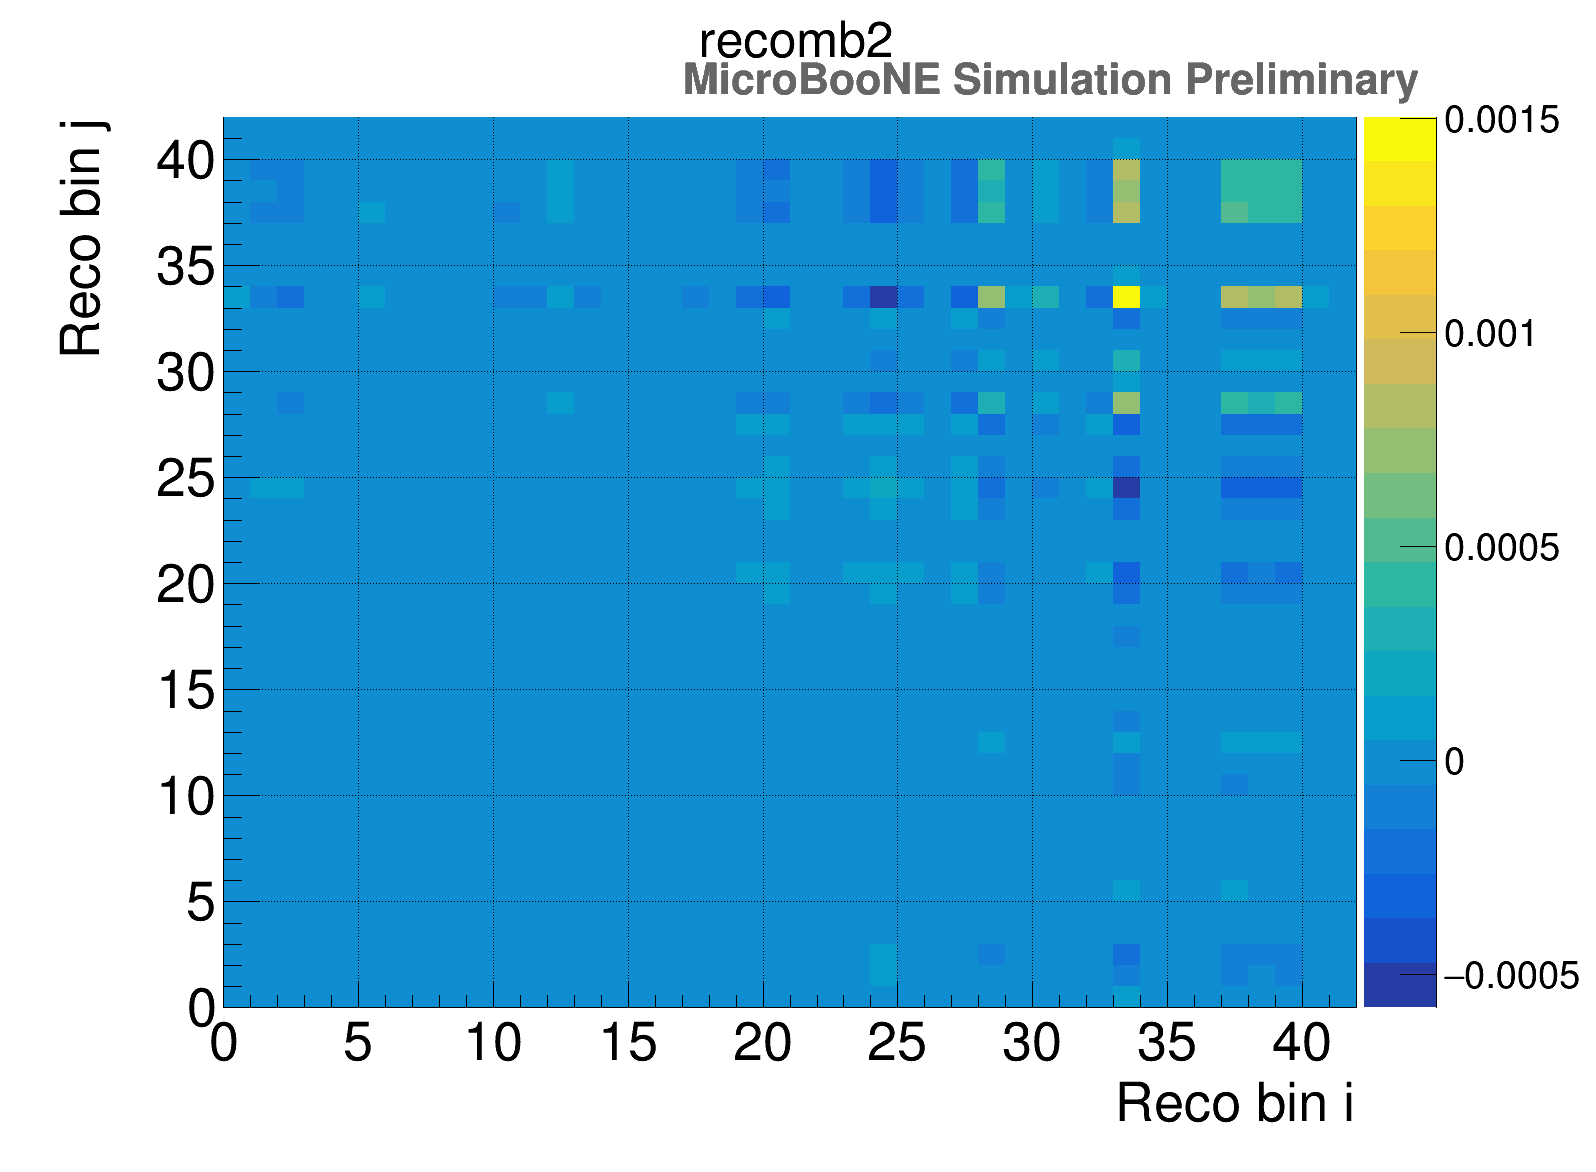

In [25]:
ROOT.gStyle.SetOptTitle(1)
#name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']
name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh', 'recomb2' ]

for det,x in enumerate(files):
    if det!=0:
        ROOT.gStyle.SetPaintTextFormat('0.6g')
        h_covariance = ROOT.TH2D("h_covariance",name_files[det],sum_bins,0,sum_bins,sum_bins,0,sum_bins)
        for i in range(sum_bins):
            for j in range(sum_bins):
                h_covariance.SetBinContent(i+1,j+1,cov_matrix_det[det,i,j])
        #h_covariance.SetXTitle("Reco bin i, 7=overflow")
        #h_covariance.SetYTitle("True bin j")
        h_covariance.SetXTitle("Reco bin i")
        h_covariance.SetYTitle("Reco bin j")

        h_covariance.GetYaxis().SetTitleSize(0.05)
        h_covariance.GetYaxis().SetTitleOffset(0.0)
        h_covariance.GetYaxis().SetLabelSize(0.05)
        h_covariance.GetXaxis().SetTitleSize(0.05)
        h_covariance.GetXaxis().SetLabelSize(0.05)
        h_covariance.GetXaxis().SetTitleOffset(1)
        h_covariance.SetLineColor(ROOT.kBlack)
        h_covariance.SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        c1.SetRightMargin(0.15)
        ROOT.gStyle.SetPaintTextFormat('0.4g')

        h_covariance.Draw('colz')
        #_covariance.Draw('same text')
        prelim = draw_sim()
        prelim.Draw()
        c1.Draw()
        c1.SaveAs(outputdir_png + 'h_covariance_detsys'+name_files[det]+'.png')
        c1.SaveAs(outputdir_root + 'h_covariance_detsys'+name_files[det]+'.root')
        c1.SaveAs(outputdir_pdf + 'h_covariance_detsys'+name_files[det]+'.pdf')
        #h_covariance.Write('h_covariance')
        

Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_covariance_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/root/h_covariance_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_covariance_detsys.pdf has been created


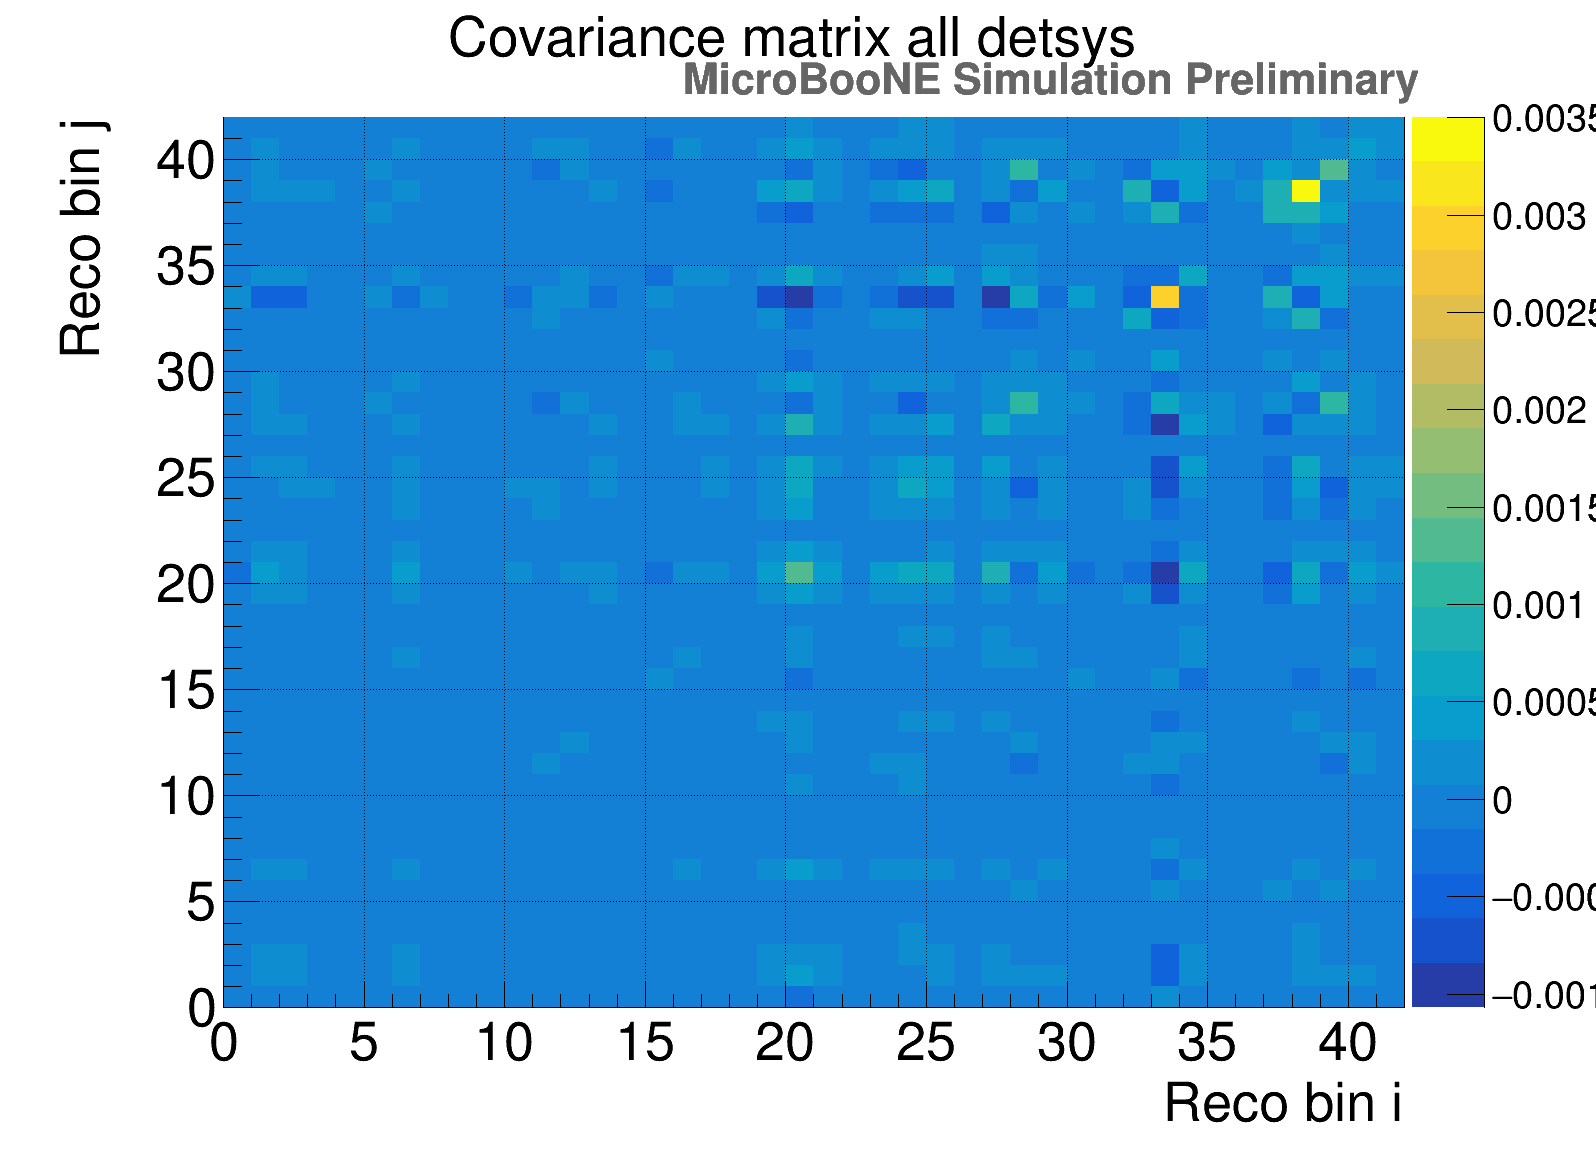

In [26]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix all detsys',sum_bins,0,sum_bins,sum_bins,0,sum_bins)
for i in range(sum_bins):
    for j in range(sum_bins):
        h_covariance.SetBinContent(i+1,j+1,cov_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')

h_covariance.Draw('colz')
#h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_detsys.png")
c1.SaveAs(outputdir_root + "h_covariance_detsys.root")
c1.SaveAs(outputdir_pdf + "h_covariance_detsys.pdf")
#h_covariance.Write('h_covariance')
RootFile = ROOT.TFile(output_filedir+"Detector_systematic_2D.root","update");
h_covariance.Write('h_covariance')
RootFile.Close()  

In [27]:
#correlation matrix
xsec_corr_matrix = np.zeros((sum_bins,sum_bins))
for i in range(sum_bins):
    for j in range(sum_bins):
        xsec_corr_matrix[i][j] = cov_matrix[i][j]/(1e-80+math.sqrt(cov_matrix[i][i]*cov_matrix[j][j]))

#correlation matrix per detsys  
xsec_corr_matrix_det = np.zeros((len(files),sum_bins,sum_bins))
for det,x in enumerate(files):
    if det!=0:
        for i in range(sum_bins):
            for j in range(sum_bins):
                xsec_corr_matrix_det[det][i][j] = cov_matrix_det[det][i][j]/(1e-80+math.sqrt(cov_matrix_det[det][i][i]*cov_matrix_det[det][j][j]))


In [28]:
#frac covariance matrix
xsec_frac_matrix = np.zeros((sum_bins,sum_bins))
for i in range(sum_bins):
    for j in range(sum_bins):
        #print cov_matrix[i][j]
        xsec_frac_matrix[i][j] = cov_matrix[i][j]/(1e-80+(xsec_cv_vec[i]*xsec_cv_vec[j]))

#correlation matrix per detsys  
xsec_frac_matrix_det = np.zeros((len(files),sum_bins,sum_bins))
for det,x in enumerate(files):
    if det!=0:
        for i in range(sum_bins):
            for j in range(sum_bins):
                xsec_frac_matrix_det[det][i][j] = cov_matrix_det[det][i][j]/(1e-80+(xsec_cv_vec[i]*xsec_cv_vec[j]))


In [29]:
#for i in range(sum_bins):
#    print i, cov_matrix[i][i], xsec_cv_vec[i]
a = 0
for t_bin in range(len_theta):
    a = a+len_mom[t_bin]
    print len_mom[t_bin],a
    

5 5
5 10
5 15
4 19
4 23
4 27
5 32
5 37
5 42


Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_correlation_detsysSCE.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_correlation_detsysSCE.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_correlation_detsysLYDown.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_correlation_detsysLYDown.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /

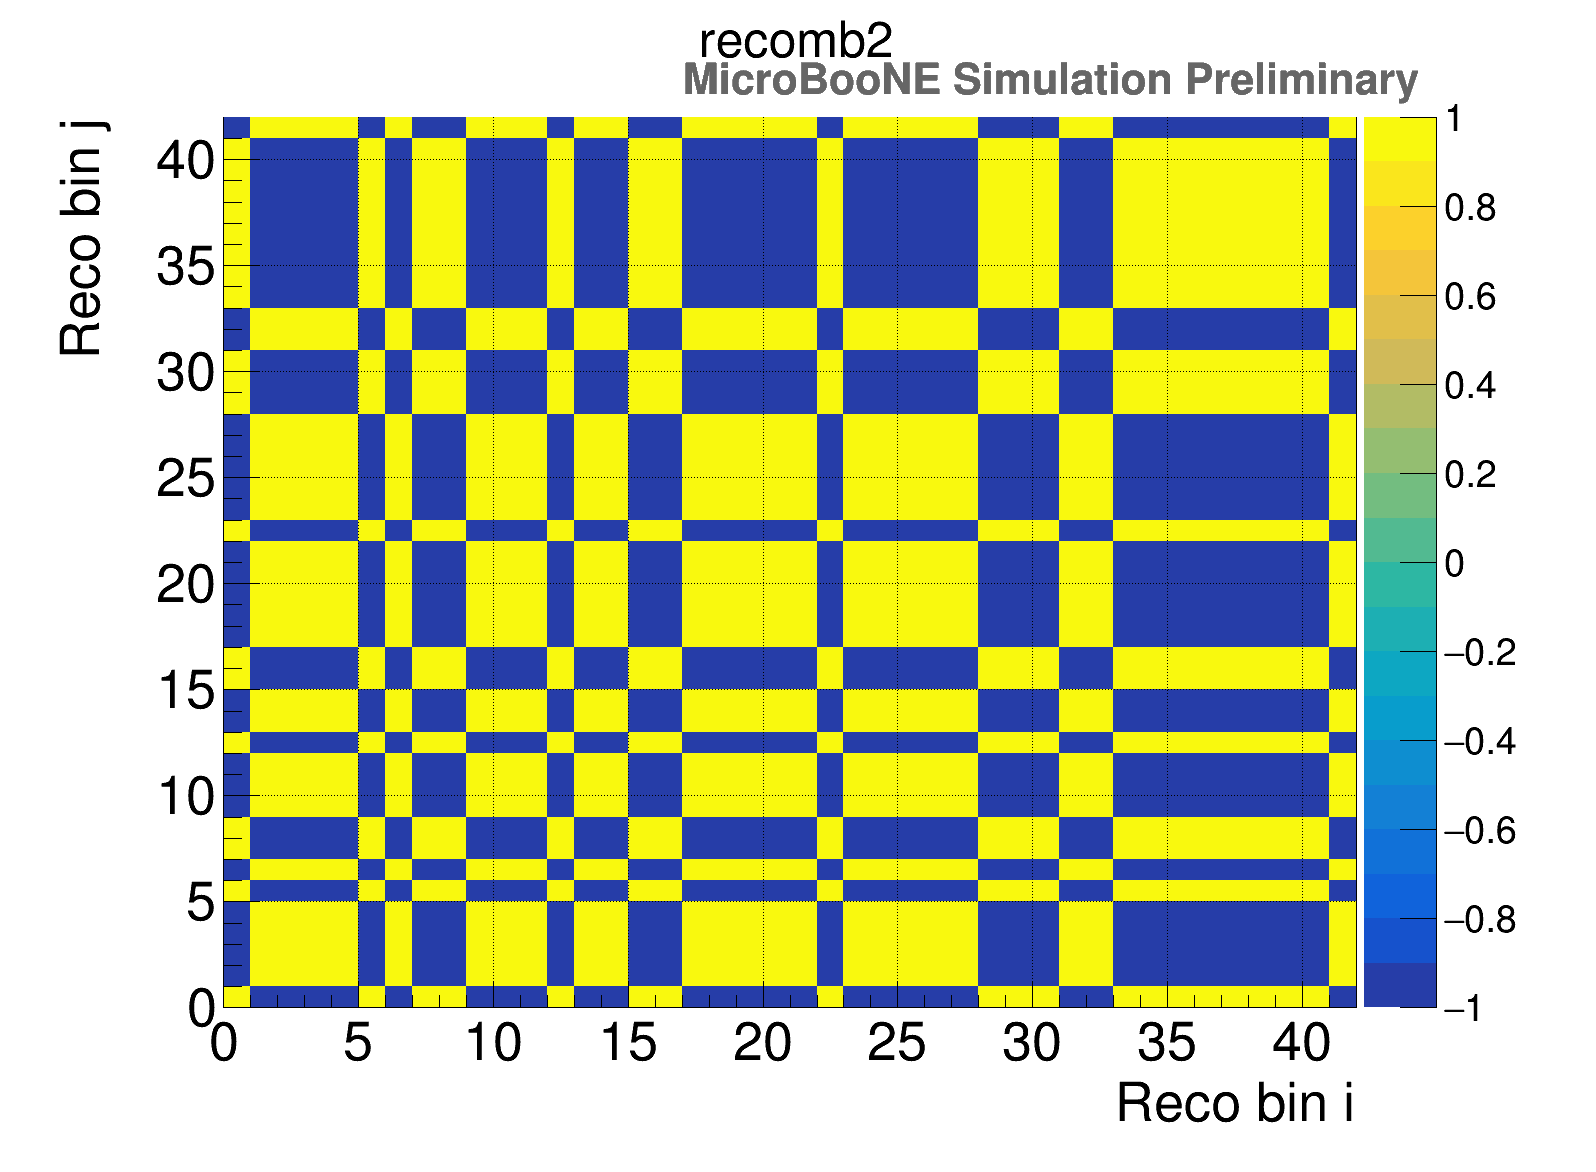

In [30]:
ROOT.gStyle.SetOptTitle(1)
#name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']
name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh', 'recomb2' ]

for det,x in enumerate(files):
    if det!=0:
        ROOT.gStyle.SetPaintTextFormat('0.6g')
        h_covariance = ROOT.TH2D("h_covariance",name_files[det],sum_bins,0,sum_bins,sum_bins,0,sum_bins)
        for i in range(sum_bins):
            for j in range(sum_bins):
                h_covariance.SetBinContent(i+1,j+1,xsec_corr_matrix_det[det][i,j])
        #h_covariance.SetXTitle("Reco bin i, 7=overflow")
        #h_covariance.SetYTitle("True bin j")
        h_covariance.SetXTitle("Reco bin i")
        h_covariance.SetYTitle("Reco bin j")

        h_covariance.GetYaxis().SetTitleSize(0.05)
        h_covariance.GetYaxis().SetTitleOffset(0.0)
        h_covariance.GetYaxis().SetLabelSize(0.05)
        h_covariance.GetXaxis().SetTitleSize(0.05)
        h_covariance.GetXaxis().SetLabelSize(0.05)
        h_covariance.GetXaxis().SetTitleOffset(1)
        h_covariance.SetLineColor(ROOT.kBlack)
        h_covariance.SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        c1.SetRightMargin(0.15)
        ROOT.gStyle.SetPaintTextFormat('0.4g')

        h_covariance.Draw('colz')
        #_covariance.Draw('same text')
        prelim = draw_sim()
        prelim.Draw()
        c1.Draw()
        c1.SaveAs(outputdir_png + 'h_correlation_detsys'+name_files[det]+'.png')
        #c1.SaveAs(outputdir_root + 'h_correlation_detsys'+name_files[det]+'.root')
        c1.SaveAs(outputdir_pdf + 'h_correlation_detsys'+name_files[det]+'.pdf')
        #h_covariance.Write('h_covariance')

Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_correlation_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/root/h_correlation_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_correlation_detsys.pdf has been created


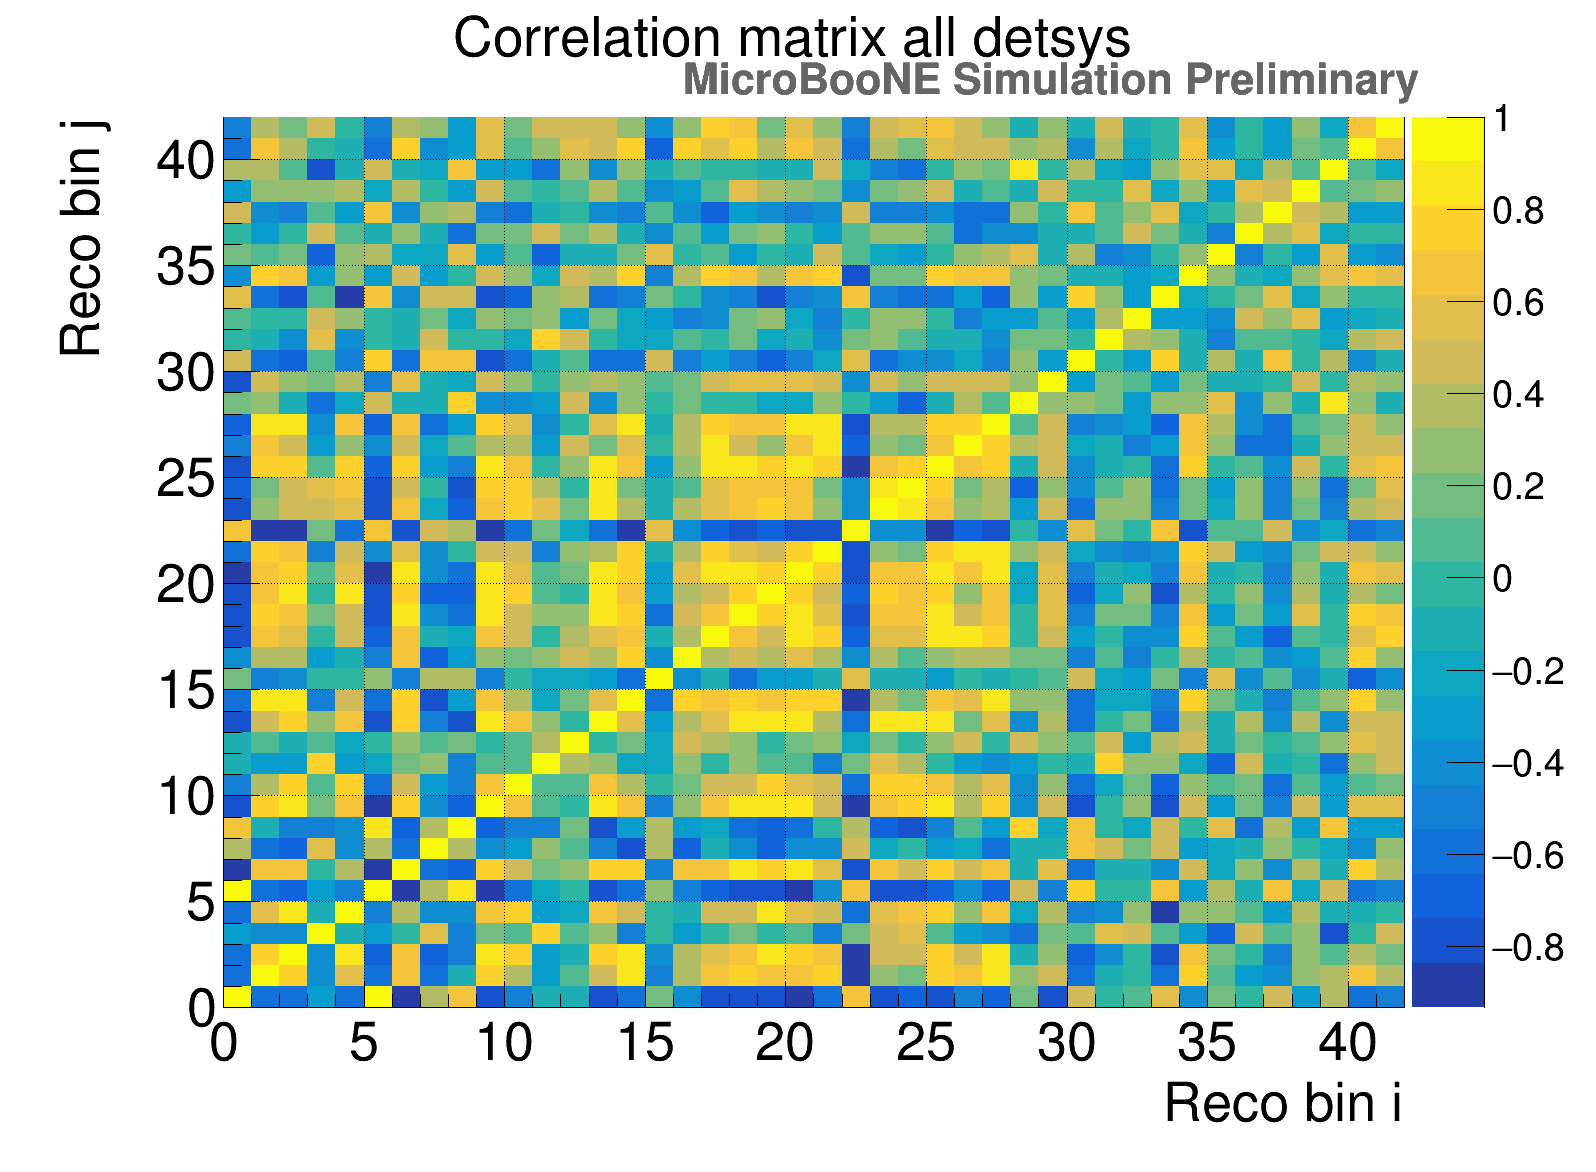

In [31]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'Correlation matrix all detsys',sum_bins,0,sum_bins,sum_bins,0,sum_bins)
for i in range(sum_bins):
    for j in range(sum_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')

h_covariance.Draw('colz')
#h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_detsys.png")
c1.SaveAs(outputdir_root + "h_correlation_detsys.root")
c1.SaveAs(outputdir_pdf + "h_correlation_detsys.pdf")
#h_covariance.Write('h_covariance')
RootFile = ROOT.TFile(output_filedir+"Detector_systematic_2D.root","update");
h_covariance.Write('h_correlation')
RootFile.Close()  

Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_frac_detsysSCE.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/root/h_frac_detsysSCE.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_frac_detsysSCE.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_frac_detsysLYDown.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/root/h_frac_detsysLYDown.roo

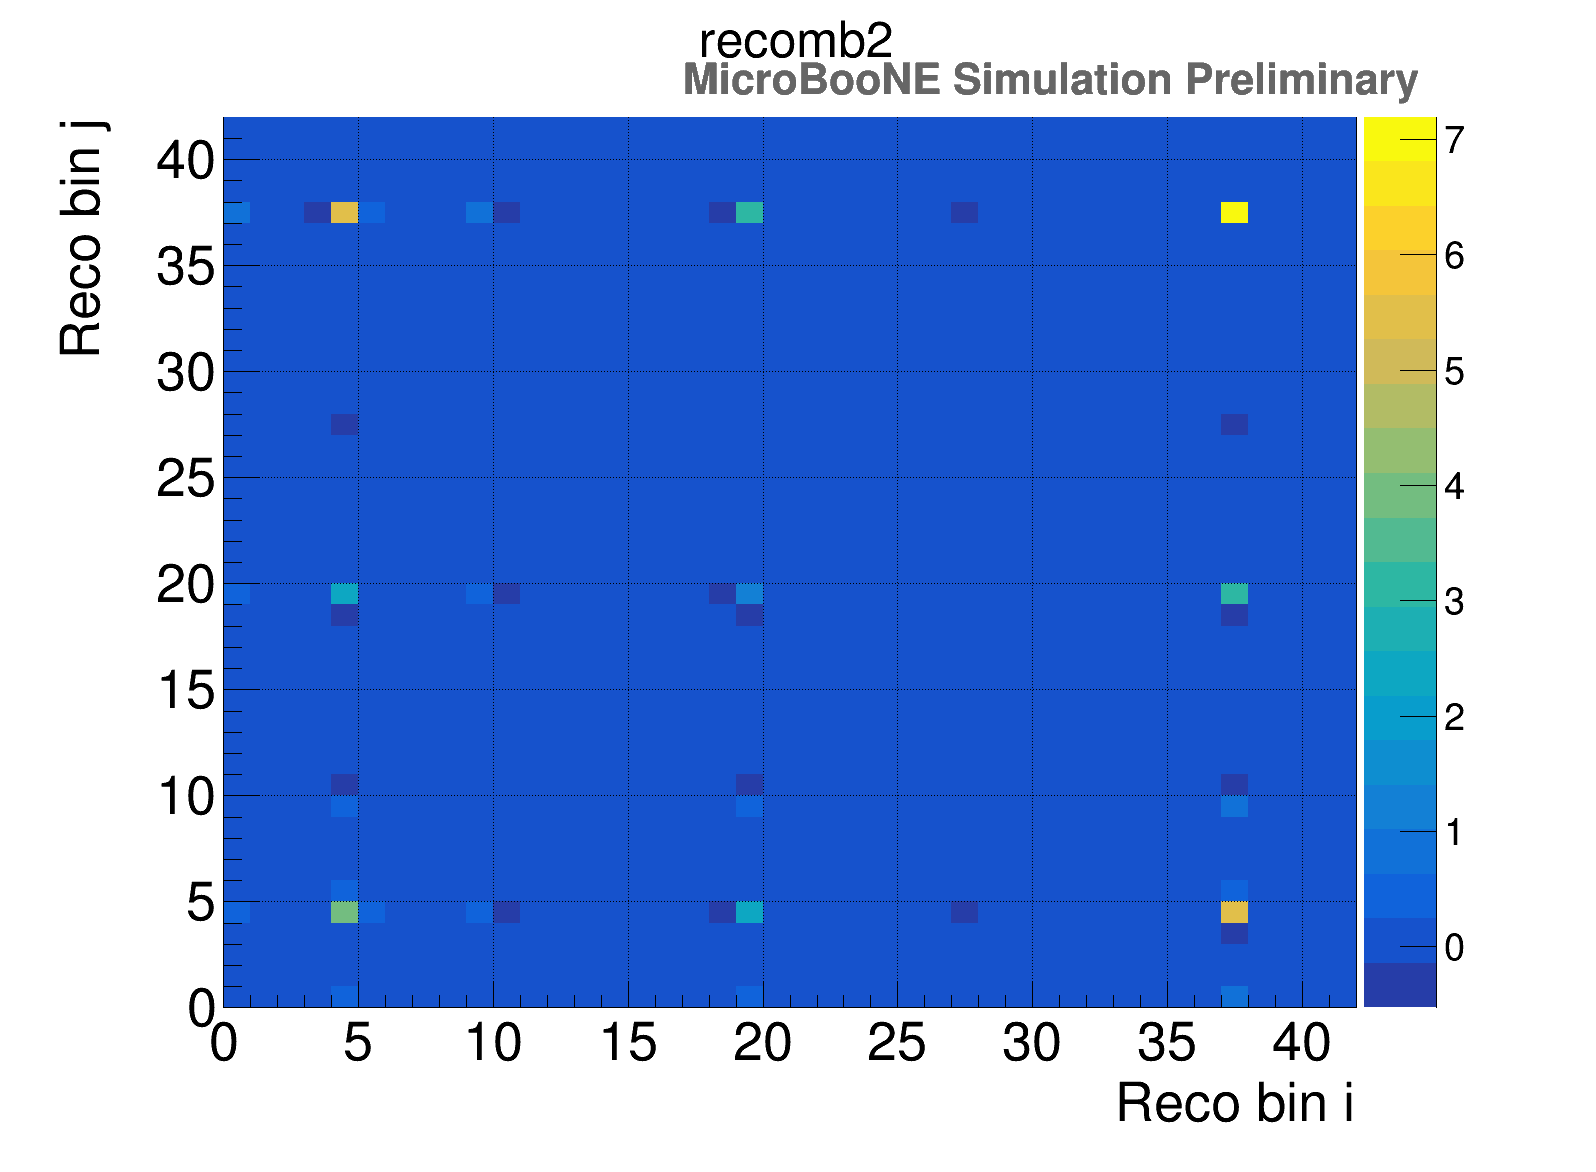

In [32]:
ROOT.gStyle.SetOptTitle(1)
#name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']
name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh', 'recomb2' ]

for det,x in enumerate(files):
    if det!=0:
        ROOT.gStyle.SetPaintTextFormat('0.6g')
        h_covariance = ROOT.TH2D("h_covariance",name_files[det],sum_bins,0,sum_bins,sum_bins,0,sum_bins)
        for i in range(sum_bins):
            for j in range(sum_bins):
                h_covariance.SetBinContent(i+1,j+1,xsec_frac_matrix_det[det][i,j])
        #h_covariance.SetXTitle("Reco bin i, 7=overflow")
        #h_covariance.SetYTitle("True bin j")
        h_covariance.SetXTitle("Reco bin i")
        h_covariance.SetYTitle("Reco bin j")

        h_covariance.GetYaxis().SetTitleSize(0.05)
        h_covariance.GetYaxis().SetTitleOffset(0.0)
        h_covariance.GetYaxis().SetLabelSize(0.05)
        h_covariance.GetXaxis().SetTitleSize(0.05)
        h_covariance.GetXaxis().SetLabelSize(0.05)
        h_covariance.GetXaxis().SetTitleOffset(1)
        h_covariance.SetLineColor(ROOT.kBlack)
        h_covariance.SetLineWidth(4)
        ROOT.gStyle.SetEndErrorSize(5)
        c1.SetRightMargin(0.15)
        ROOT.gStyle.SetPaintTextFormat('0.4g')

        h_covariance.Draw('colz')
        #_covariance.Draw('same text')
        prelim = draw_sim()
        prelim.Draw()
        c1.Draw()
        c1.SaveAs(outputdir_png + 'h_frac_detsys'+name_files[det]+'.png')
        c1.SaveAs(outputdir_root + 'h_frac_detsys'+name_files[det]+'.root')
        c1.SaveAs(outputdir_pdf + 'h_frac_detsys'+name_files[det]+'.pdf')
        #h_covariance.Write('h_covariance')

Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_frac_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/root/h_frac_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_frac_detsys.pdf has been created


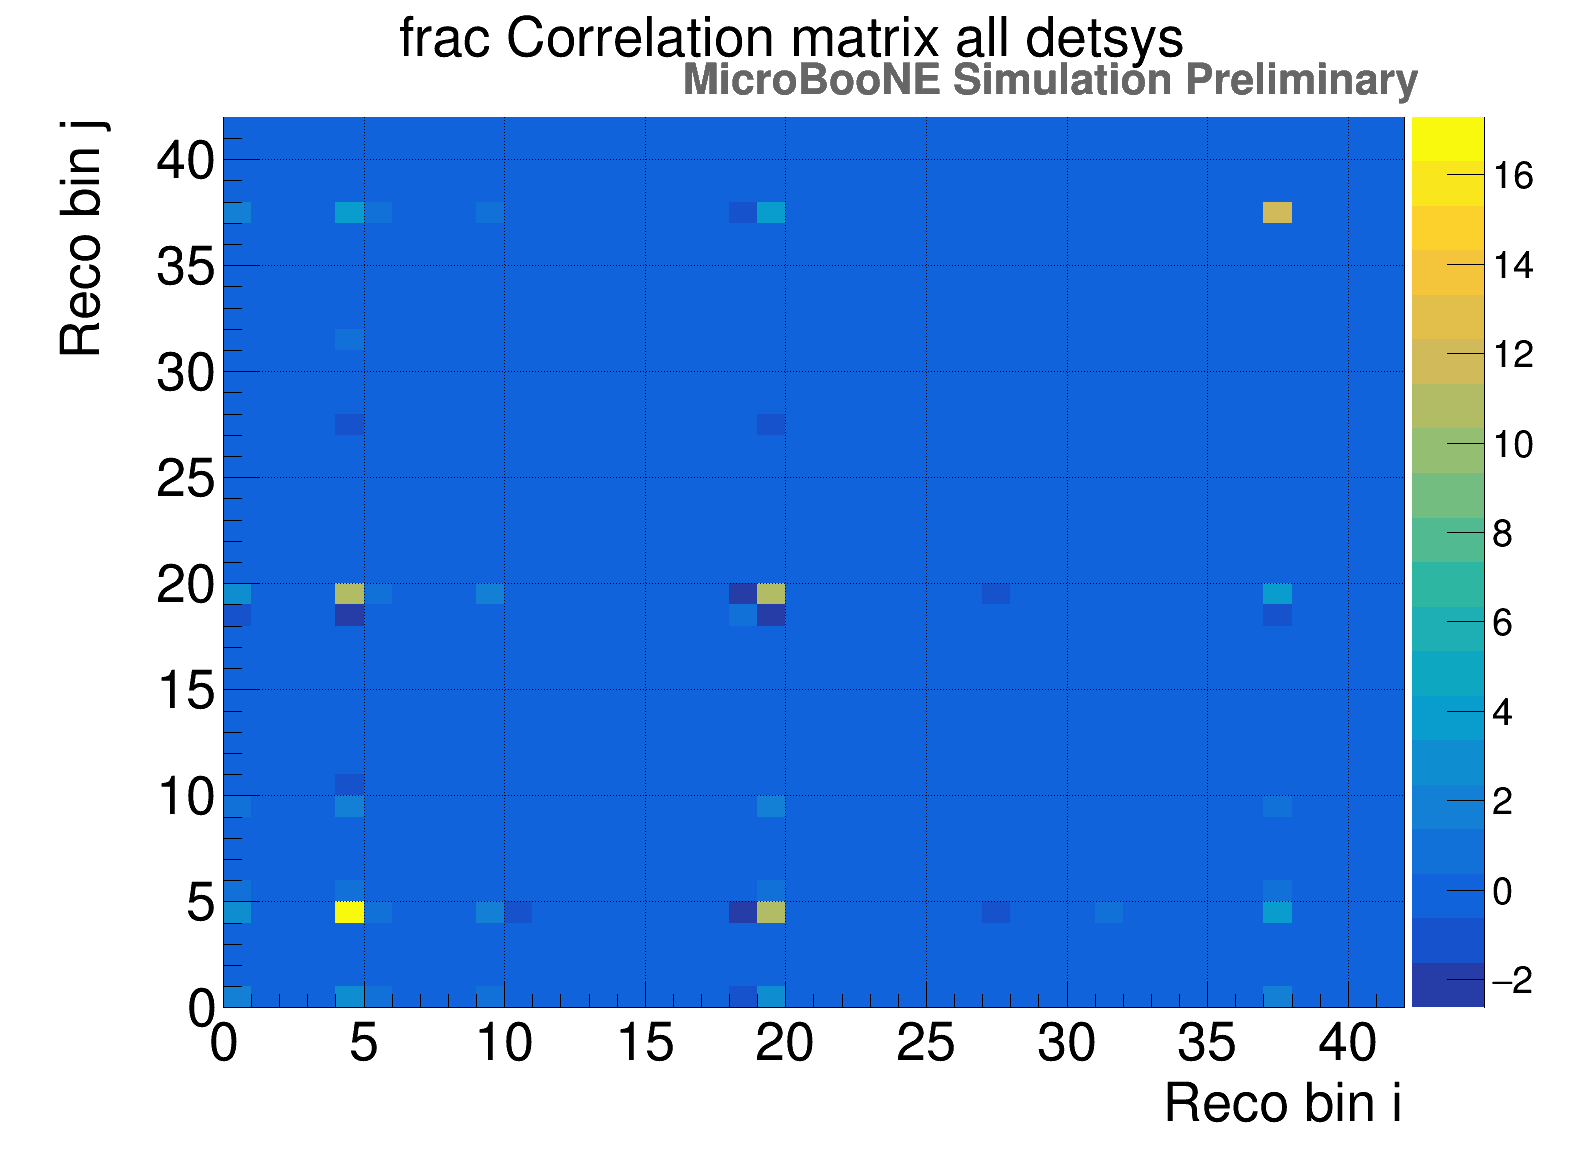

In [33]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'frac Correlation matrix all detsys',sum_bins,0,sum_bins,sum_bins,0,sum_bins)
for i in range(sum_bins):
    for j in range(sum_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_frac_matrix[i,j])
#for i in range(sum_bins):
#    if(i!=19):
#        for j in range(sum_bins):
#            if(j!=19):
#                h_covariance.SetBinContent(i+1,j+1,xsec_frac_matrix[i,j])

#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')
h_covariance.Draw('colz')
#h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_detsys.png")
c1.SaveAs(outputdir_root + "h_frac_detsys.root")
c1.SaveAs(outputdir_pdf + "h_frac_detsys.pdf")
#h_covariance.Write('h_covariance')
RootFile = ROOT.TFile(output_filedir+"Detector_systematic_2D.root","update");
h_covariance.Write('h_frac_covariance')
RootFile.Close()  

In [34]:
# draw all xsec
files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_recomb2]
name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']

ROOT.gStyle.SetOptTitle(1)
bin_counter = 0
for t_bin in range(len_theta): #len_theta
    print 'Teha bin: ', t_bin
    legend = ROOT.TLegend(0.55,0.35,0.9,0.9); #LEGEND RIGHT
    h_xsec_this = h_xsec_data[t_bin][0].Clone()
    
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)

    c1.cd()
    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)
    
    for i,x in enumerate(files):
        #bin_counter_2 = 0
        h_xsec_data[t_bin][i].SetLineColorAlpha(i+1,0.8)
        if (i+1)==10:
            h_xsec_data[t_bin][i].SetLineColorAlpha(30,0.8)
        legend.AddEntry(h_xsec_data[t_bin][i],name_files[i],"f")
        h_xsec_data[t_bin][i].SetLineWidth(4)
        if i == 0:
            h_xsec_this.SetLineColorAlpha(1,0.8)
            h_xsec_this.SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
            h_xsec_this.SetXTitle("p^{reco}_{#mu} [GeV]")
            h_xsec_this.SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
            h_xsec_this.SetMaximum(-1111)
            h_xsec_this.SetMaximum( h_xsec_this.GetMaximum()*1.5)
            h_xsec_this.GetYaxis().SetLabelSize(0.05);
            h_xsec_this.GetYaxis().SetTitleSize(0.05);
            h_xsec_this.GetYaxis().SetTitleOffset(0.8);
            h_xsec_this.GetXaxis().SetLabelOffset(999);
            h_xsec_this.GetXaxis().SetTitleOffset(999);
            h_xsec_this.GetXaxis().SetLabelSize(0);
            h_xsec_this.GetXaxis().SetTitleSize(0);
            for m_bin in range(len_mom[t_bin]):
                h_xsec_this.SetBinError(m_bin+1,math.sqrt(cov_matrix[bin_counter][bin_counter]))
                #print bin_counter, math.sqrt(cov_matrix[bin_counter][bin_counter]),  math.sqrt(cov_matrix[bin_counter][bin_counter]/xsec_cv_vec[bin_counter]/xsec_cv_vec[bin_counter])
                bin_counter +=1
            h_xsec_this.Draw('E1')
        else:
            h_xsec_data[t_bin][i].Draw('hist same')
    h_xsec_this.Draw('E1 same')
    legend.Draw()
    #bin_counter += len_mom[t_bin]
    #print bin_counter

    
    c1.cd()
    h_xsec_data[t_bin][0].GetXaxis().SetLabelOffset(0);
    h_xsec_data[t_bin][0].GetXaxis().SetTitleOffset(0);
    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    h_files2 = []
    
    for i,x in enumerate(files):
        h_files2.append(h_xsec_data[t_bin][i].Clone())
        h_files2[i].SetLineColorAlpha(i+1,0.8)
        h_files2[i].SetTitle(' ')
        if (i+1)==10:
            h_files2[i].SetLineColorAlpha(30,0.8)
        if i ==0 :
            for m_bin in range(len_mom[t_bin]):
                h_files2[i].SetBinError(m_bin+1,1e-80)
            h_files2[i].Divide(h_xsec_this)
            #for m_bin in range(len_mom[t_bin]):
                #print 'Error: ',m_bin,' - ', h_files2[i].GetBinError(m_bin+1)
            h_files2[i].SetYTitle('Data/(Ext+MC)')
            h_files2[i].GetYaxis().SetTitleSize(0.1)
            h_files2[i].GetYaxis().SetTitleOffset(0.3)
            h_files2[i].GetYaxis().SetLabelSize(0.07)

            h_files2[i].GetXaxis().SetTitleSize(0.15)
            h_files2[i].GetXaxis().SetLabelSize(0.15)
            h_files2[i].GetXaxis().SetTitleOffset(1)
            h_files2[i].SetMinimum(-1111)
            h_files2[i].SetMaximum(-1111)
            h_files2[i].Draw('E1 hist')
        else:
            h_files2[i].Divide(h_xsec_this)
            h_files2[i].Draw('hist same')

    h_files2[0].Draw('E1 same')
    c1.Draw()
    
    c1.SaveAs(globale.outputdir_png + 'h_xsec_2D_'+str(t_bin)+'_syserr.png')
    #c1.SaveAs(globale.outputdir_root + 'h_xsec_2D_'+str(t_bin)+'_syserr.root')
    c1.SaveAs(globale.outputdir_pdf + 'h_xsec_2D_'+str(t_bin)+'_syserr.pdf')

    c1.Draw()
#ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Teha bin:  0
Teha bin:  1
Teha bin:  2
Teha bin:  3
Teha bin:  4
Teha bin:  5
Teha bin:  6
Teha bin:  7
Teha bin:  8


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_xsec_2D_0_syserr.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_xsec_2D_0_syserr.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/png/h_xsec_2D_1_syserr.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t/pdf/h_xsec_2D_1_syserr.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all_2D_t